In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime


In [184]:
now = datetime.now()
start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'GOOG'
try:
    df = yf.download(ticker, start, end, auto_adjust=False)
except:
    print('No intranet')

[*********************100%***********************]  1 of 1 completed


In [185]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2015-10-12,32.113743,32.333500,32.424999,31.950500,32.104500,25504000
2015-10-13,32.393326,32.615002,32.890598,32.157501,32.157501,36154000
2015-10-14,32.336712,32.557999,32.969501,32.442501,32.660500,28310000
2015-10-15,32.862118,33.087002,33.156502,32.723000,32.733002,37714000
2015-10-16,32.884960,33.110001,33.248501,32.860001,33.205502,32222000


## 2. Data Exploration and Visualization

In [186]:
type(df)

pandas.core.frame.DataFrame

In [187]:
df.shape

(2514, 6)

In [188]:
df.isna().sum()

Price      Ticker
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

In [189]:
df.dtypes

Price      Ticker
Adj Close  GOOG      float64
Close      GOOG      float64
High       GOOG      float64
Low        GOOG      float64
Open       GOOG      float64
Volume     GOOG        int64
dtype: object

In [190]:
df = df.reset_index()
df

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-10-12,32.113743,32.333500,32.424999,31.950500,32.104500,25504000
1,2015-10-13,32.393326,32.615002,32.890598,32.157501,32.157501,36154000
2,2015-10-14,32.336712,32.557999,32.969501,32.442501,32.660500,28310000
3,2015-10-15,32.862118,33.087002,33.156502,32.723000,32.733002,37714000
4,2015-10-16,32.884960,33.110001,33.248501,32.860001,33.205502,32222000
...,...,...,...,...,...,...,...
2509,2025-10-03,246.449997,246.449997,247.117996,242.470001,245.229996,19941400
2510,2025-10-06,251.509995,251.509995,252.199997,245.690002,245.779999,18309000
2511,2025-10-07,247.130005,247.130005,251.550003,246.809998,248.929993,13811200


Text(0, 0.5, 'Price')

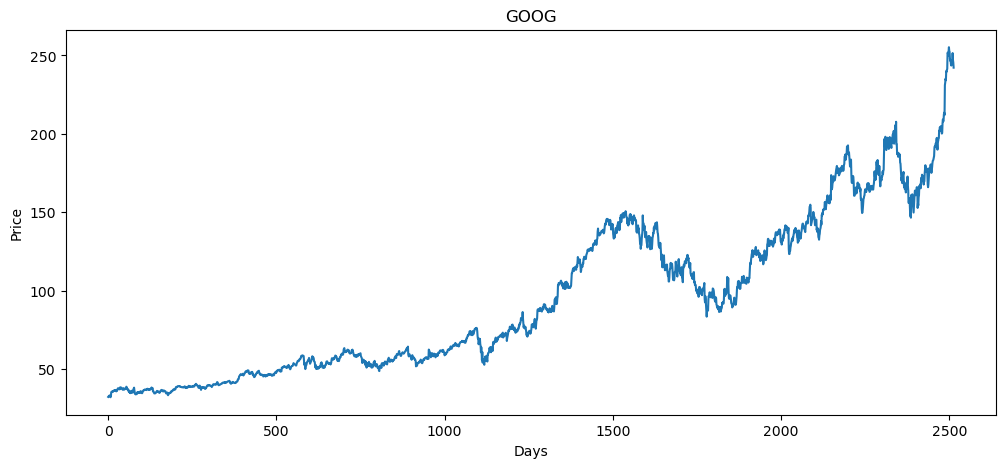

In [191]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Price')

## 3.Feature Engineering

#### 100 Days moving average

In [ ]:
df['MA_100'] = df.Close.rolling(100).mean()

In [193]:
df.head(103)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,
0,2015-10-12,32.113743,32.333500,32.424999,31.950500,32.104500,25504000,NaN
1,2015-10-13,32.393326,32.615002,32.890598,32.157501,32.157501,36154000,NaN
2,2015-10-14,32.336712,32.557999,32.969501,32.442501,32.660500,28310000,NaN
3,2015-10-15,32.862118,33.087002,33.156502,32.723000,32.733002,37714000,NaN
4,2015-10-16,32.884960,33.110001,33.248501,32.860001,33.205502,32222000,NaN
...,...,...,...,...,...,...,...,...
98,2016-03-03,35.378891,35.620998,35.972500,35.300999,35.933998,39160000,NaN
99,2016-03-04,35.302914,35.544498,35.824501,35.300999,35.749500,39442000,36.020270
100,2016-03-07,34.521759,34.757999,35.404549,34.345001,35.345001,59702000,36.044515


Text(0, 0.5, 'Price')

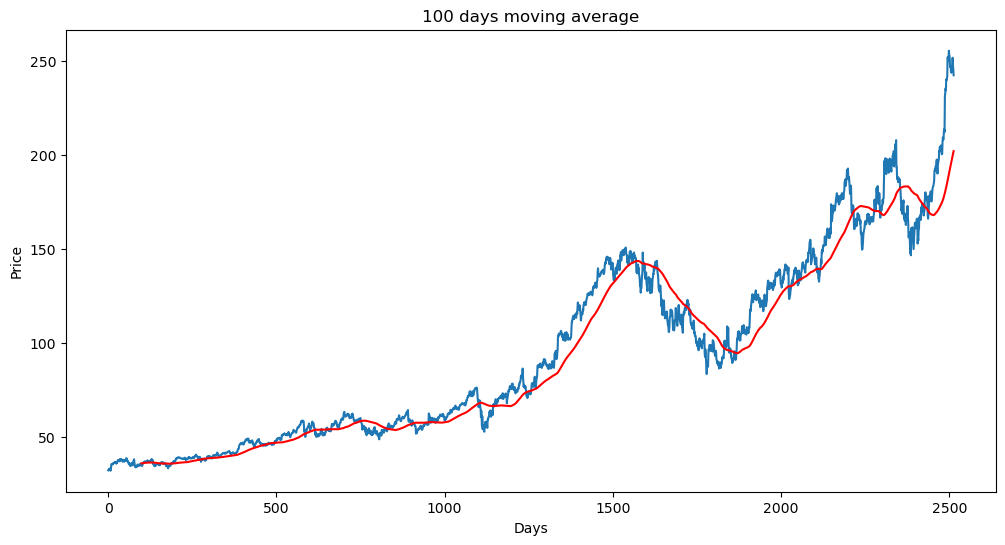

In [194]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(df.MA_100, 'r')
plt.title('100 days moving average')
plt.xlabel('Days')
plt.ylabel('Price')

In [195]:

df['MA_200'] = df.Close.rolling(200).mean()
df

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,,
0,2015-10-12,32.113743,32.333500,32.424999,31.950500,32.104500,25504000,NaN,NaN
1,2015-10-13,32.393326,32.615002,32.890598,32.157501,32.157501,36154000,NaN,NaN
2,2015-10-14,32.336712,32.557999,32.969501,32.442501,32.660500,28310000,NaN,NaN
3,2015-10-15,32.862118,33.087002,33.156502,32.723000,32.733002,37714000,NaN,NaN
4,2015-10-16,32.884960,33.110001,33.248501,32.860001,33.205502,32222000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2509,2025-10-03,246.449997,246.449997,247.117996,242.470001,245.229996,19941400,198.6320,187.79940
2510,2025-10-06,251.509995,251.509995,252.199997,245.690002,245.779999,18309000,199.5382,188.06615
2511,2025-10-07,247.130005,247.130005,251.550003,246.809998,248.929993,13811200,200.3414,188.31620


Text(0, 0.5, 'Price')

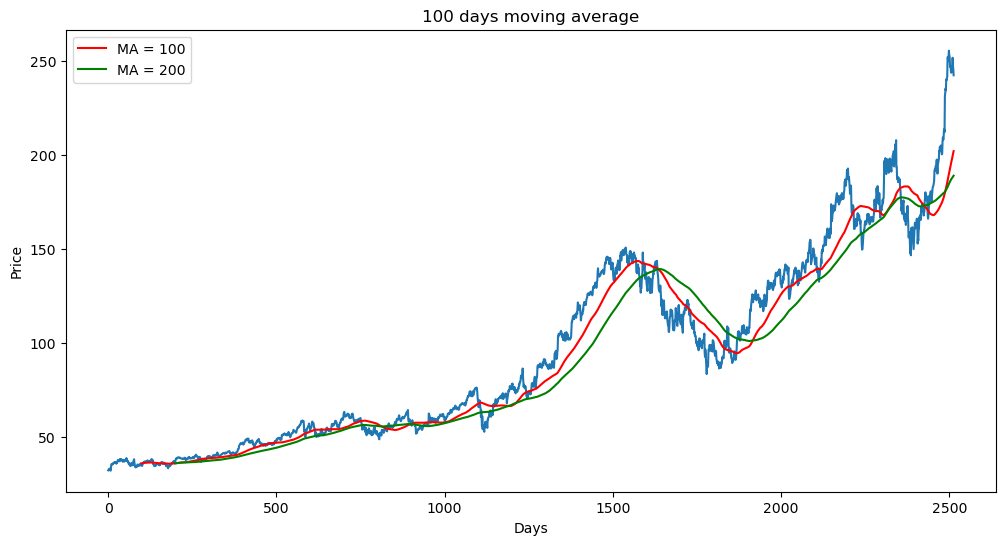

In [196]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(df.MA_100, 'r', label='MA = 100')
plt.plot(df.MA_200, 'g', label='MA = 200')
plt.legend()
plt.title('100 days moving average')
plt.xlabel('Days')
plt.ylabel('Price')

#### Calculating % changed in each trading sessing

In [197]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close','Percentage Changed']]
# df.drop('Percentage Changed', axis=1, level=0, inplace=True)

Price,Close,Percentage Changed
Ticker,GOOG,
0,32.333500,NaN
1,32.615002,0.008706
2,32.557999,-0.001748
3,33.087002,0.016248
4,33.110001,0.000695
...,...,...
2509,246.449997,0.000081
2510,251.509995,0.020532
2511,247.130005,-0.017415


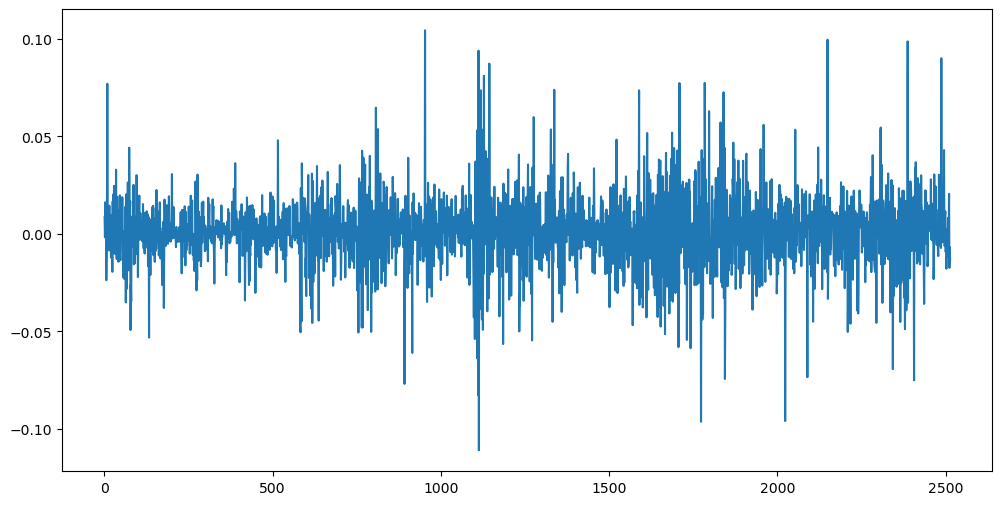

In [198]:
plt.figure(figsize=(12,6))
plt.plot(df['Percentage Changed'])

## Data preprocessing

In [199]:
df.shape

(2514, 10)

In [200]:
#Splitting data into Training and Testing dates
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])
print(data_training)
print(data_testing)

Ticker        GOOG
0        32.333500
1        32.615002
2        32.557999
3        33.087002
4        33.110001
...            ...
1754     98.089996
1755     96.150002
1756     99.300003
1757    102.410004
1758    102.220001

[1759 rows x 1 columns]
Ticker        GOOG
1759    102.239998
1760     99.570000
1761     98.709999
1762     98.050003
1763     98.300003
...            ...
2509    246.449997
2510    251.509995
2511    247.130005
2512    245.460007
2513    242.210007

[755 rows x 1 columns]


In [201]:
data_training

Ticker,GOOG
0,32.333500
1,32.615002
2,32.557999
3,33.087002
4,33.110001
...,...
1754,98.089996
1755,96.150002
1756,99.300003
1757,102.410004


In [202]:
data_testing

Ticker,GOOG
1759,102.239998
1760,99.570000
1761,98.709999
1762,98.050003
1763,98.300003
...,...
2509,246.449997
2510,251.509995
2511,247.130005
2512,245.460007


In [203]:
#Scaling down the data b/w 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [204]:
data_training_array = scaler.fit_transform(data_training)

In [205]:
type(data_training_array)


numpy.ndarray

In [206]:
data_training_array.shape

(1759, 1)

### 5.Sequence Creation

In [207]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [208]:
x_train.ndim

3

In [209]:
y_train.ndim

1

### 6.Model building

In [210]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [211]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [212]:
#ML Models
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [213]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation = 'tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

### 7. Model Training

In [214]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0085
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 6.1397e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 6.5278e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.9407e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.9072e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.7390e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.4599e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.3685e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.4731e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 4.6504e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.4036e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 4.4085e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 5.9256e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 5.5065e-04
Epoch 15/50
52/52 ━

In [215]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [216]:
# Save the trained model
model.save('stock_prediction_model.keras')

## 8. Preparing test data

In [217]:
data_testing

Ticker,GOOG
1759,102.239998
1760,99.570000
1761,98.709999
1762,98.050003
1763,98.300003
...,...
2509,246.449997
2510,251.509995
2511,247.130005
2512,245.460007


In [218]:
past_100_days = data_training.tail(100)

In [219]:
past_100_days

Ticker,GOOG
1659,116.515503
1660,114.792503
1661,116.701500
1662,112.401001
1663,110.745499
...,...
1754,98.089996
1755,96.150002
1756,99.300003
1757,102.410004


In [220]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [221]:
final_df

Ticker,GOOG
0,116.515503
1,114.792503
2,116.701500
3,112.401001
4,110.745499
...,...
850,246.449997
851,251.509995
852,247.130005
853,245.460007


In [222]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.19228823],
       [0.18225621],
       [0.19337118],
       [0.16833189],
       [0.15869287],
       [0.15035228],
       [0.1640553 ],
       [0.13063175],
       [0.1301281 ],
       [0.14443085],
       [0.17064923],
       [0.17786901],
       [0.1784396 ],
       [0.19945271],
       [0.18092579],
       [0.1951703 ],
       [0.19644542],
       [0.1964949 ],
       [0.1829869 ],
       [0.16266375],
       [0.13616596],
       [0.13801456],
       [0.15662593],
       [0.13476566],
       [0.14192432],
       [0.16608443],
       [0.16619504],
       [0.16998255],
       [0.20406406],
       [0.1929112 ],
       [0.16932462],
       [0.16749054],
       [0.15069868],
       [0.14900147],
       [0.176984  ],
       [0.18470743],
       [0.20853566],
       [0.21355752],
       [0.19232897],
       [0.18258808],
       [0.16708587],
       [0.16273656],
       [0.17046288],
       [0.15382827],
       [0.18125184],
       [0.1817176 ],
       [0.18369724],
       [0.144

In [223]:
input_data.shape

(855, 1)

In [224]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [225]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [226]:
x_test.shape

(755, 100, 1)

## 9.Making Prediction

In [227]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [228]:
y_predicted

array([[0.10084292],
       [0.10443643],
       [0.09930312],
       [0.09275108],
       [0.08721689],
       [0.08486442],
       [0.0874702 ],
       [0.08405132],
       [0.0893625 ],
       [0.09556405],
       [0.09665376],
       [0.09683201],
       [0.09898556],
       [0.1041808 ],
       [0.11254756],
       [0.09335718],
       [0.07279285],
       [0.06953266],
       [0.06658086],
       [0.05572282],
       [0.04032411],
       [0.02260632],
       [0.01742815],
       [0.02074432],
       [0.02522345],
       [0.02505676],
       [0.0380387 ],
       [0.05479139],
       [0.06424916],
       [0.07447894],
       [0.08133641],
       [0.08359104],
       [0.08248418],
       [0.07678305],
       [0.0762178 ],
       [0.08047129],
       [0.08118226],
       [0.07784614],
       [0.07325902],
       [0.08419168],
       [0.09331521],
       [0.09713985],
       [0.09593118],
       [0.08815844],
       [0.07747337],
       [0.06802756],
       [0.06075792],
       [0.057

In [229]:
y_test

array([0.1091703 , 0.09362446, 0.08861718, 0.08477441, 0.08623001,
       0.0944396 , 0.07970889, 0.10066958, 0.10422126, 0.09781661,
       0.09921397, 0.1047453 , 0.11342068, 0.12483261, 0.06596798,
       0.05304221, 0.07621545, 0.06503642, 0.04081515, 0.02084426,
       0.        , 0.01868995, 0.03004369, 0.03155753, 0.02276567,
       0.06218341, 0.07708882, 0.0730131 , 0.08867542, 0.09024745,
       0.08739448, 0.0833188 , 0.07184864, 0.08058226, 0.08925765,
       0.08215429, 0.07429404, 0.0695779 , 0.10457059, 0.10358079,
       0.10096072, 0.0953712 , 0.08046579, 0.06788939, 0.06090247,
       0.05577876, 0.05863173, 0.07196507, 0.06882096, 0.04489082,
       0.04291122, 0.0329549 , 0.03574963, 0.03935954, 0.02777295,
       0.03679767, 0.02585154, 0.01729258, 0.03179039, 0.03050949,
       0.0361572 , 0.03039302, 0.01909752, 0.02719072, 0.03091706,
       0.03347889, 0.05106261, 0.04902478, 0.05420672, 0.05048038,
       0.04826783, 0.06066961, 0.09193595, 0.10317322, 0.09152

In [230]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [231]:
y_predicted

array([100.80978 , 101.426956, 100.54531 ,  99.42    ,  98.4695  ,
        98.06546 ,  98.51301 ,  97.92581 ,  98.838005,  99.90312 ,
       100.09028 , 100.120895, 100.49077 , 101.38305 , 102.820045,
        99.52409 ,  95.99217 ,  95.432236,  94.92526 ,  93.060394,
        90.41566 ,  87.37263 ,  86.483284,  87.05283 ,  87.82213 ,
        87.793495,  90.02315 ,  92.90041 ,  94.52479 ,  96.28175 ,
        97.459526,  97.846756,  97.656654,  96.67749 ,  96.58041 ,
        97.310936,  97.43306 ,  96.86008 ,  96.072235,  97.94992 ,
        99.51689 , 100.17376 ,  99.96617 ,  98.6312  ,  96.79605 ,
        95.17373 ,  93.92517 ,  93.44188 ,  94.17771 ,  94.657326,
        93.307335,  91.99643 ,  90.56651 ,  89.8362  ,  89.75328 ,
        89.11588 ,  89.15581 ,  88.644394,  87.67868 ,  87.8551  ,
        88.13942 ,  88.68823 ,  88.73094 ,  87.95017 ,  87.78006 ,
        88.039085,  88.457924,  89.858444,  90.82127 ,  91.649536,
        91.88559 ,  91.76378 ,  92.42219 ,  95.07126 ,  97.881

In [232]:
y_test

array([102.23999786,  99.56999969,  98.70999908,  98.05000305,
        98.30000305,  99.70999908,  97.18000031, 100.77999878,
       101.38999939, 100.29000092, 100.52999878, 101.48000336,
       102.97000122, 104.93000031,  94.81999969,  92.59999847,
        96.58000183,  94.66000366,  90.5       ,  87.06999969,
        83.48999786,  86.69999695,  88.65000153,  88.91000366,
        87.40000153,  94.16999817,  96.73000336,  96.02999878,
        98.72000122,  98.98999786,  98.5       ,  97.80000305,
        95.83000183,  97.33000183,  98.81999969,  97.59999847,
        96.25      ,  95.44000244, 101.44999695, 101.27999878,
       100.83000183,  99.87000275,  97.30999756,  95.15000153,
        93.94999695,  93.06999969,  93.55999756,  95.84999847,
        95.30999756,  91.19999695,  90.86000061,  89.15000153,
        89.62999725,  90.25      ,  88.26000214,  89.80999756,
        87.93000031,  86.45999908,  88.94999695,  88.73000336,
        89.69999695,  88.70999908,  86.76999664,  88.16

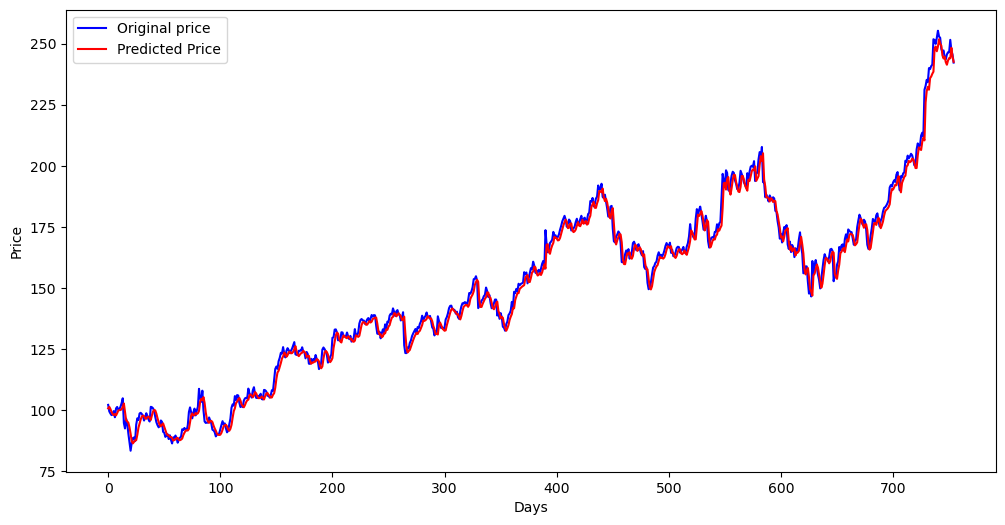

In [233]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(125.0, 263.8275058746338)

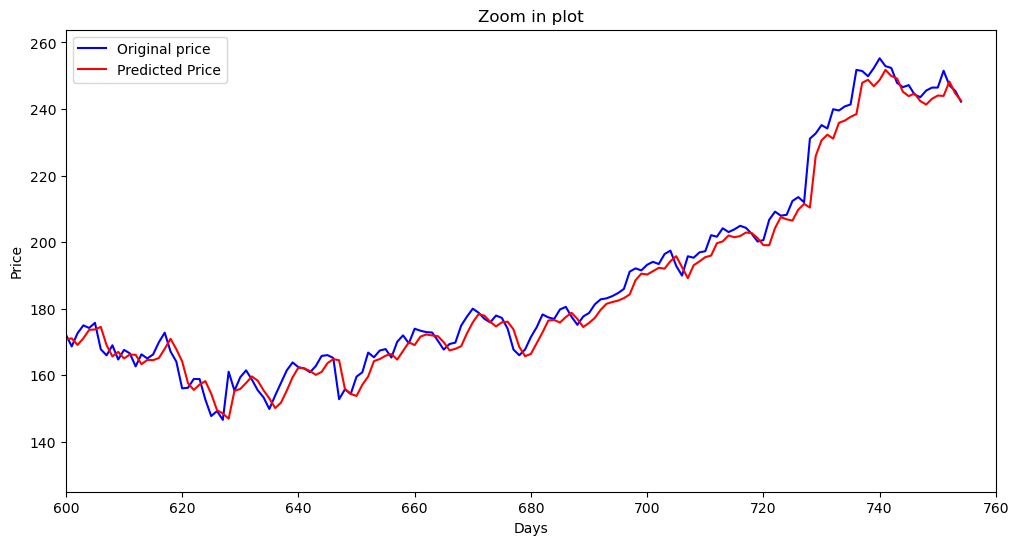

In [241]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.title("Zoom in plot")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(600,760)
plt.ylim(125)

## 10 Model evaluation

### Mean square error(MSE)

In [246]:
from sklearn.metrics import mean_squared_error, r2_score

In [243]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 11.443370647884255


### Root Mean Squarred Error (RMSE)

In [244]:
rmse = np.sqrt(mse)
print(f"Root Mean Square Error (RMSE) : {rmse}")

Root Mean Square Error (RMSE) : 3.3828051448293994


### R-Squared

In [247]:
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared : {r2}")

R-Squared : 0.9916304291728144
